In [0]:
%tensorflow_version 2.x

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import *

In [0]:
# Load CIFAR 10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [0]:
model = models.Sequential()
conv = VGG16(include_top=False, weights="imagenet", input_shape=(32, 32, 3), pooling='max')
for l in range(len(conv.layers)-2):
    layer = conv.layers[l]
    layer.trainable = False
    model.add(layer)
    model.add(layers.Activation('elu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation (Activation)      (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)        0

In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(1e-2),
              metrics=['accuracy'])

In [7]:
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
h = model.fit(X_train, y_train, 
              batch_size=256, 
              epochs=100,
              validation_data=(X_test, y_test),
              verbose = 2,
              callbacks=[early_stop])

Epoch 1/100
196/196 - 17s - loss: 1.4695 - accuracy: 0.4957 - val_loss: 1.3387 - val_accuracy: 0.5356
Epoch 2/100
196/196 - 16s - loss: 1.2688 - accuracy: 0.5631 - val_loss: 1.2790 - val_accuracy: 0.5570
Epoch 3/100
196/196 - 16s - loss: 1.2249 - accuracy: 0.5753 - val_loss: 1.2498 - val_accuracy: 0.5641
Epoch 4/100
196/196 - 16s - loss: 1.1990 - accuracy: 0.5859 - val_loss: 1.2310 - val_accuracy: 0.5752
Epoch 5/100
196/196 - 16s - loss: 1.1823 - accuracy: 0.5907 - val_loss: 1.2262 - val_accuracy: 0.5768
Epoch 6/100
196/196 - 16s - loss: 1.1746 - accuracy: 0.5944 - val_loss: 1.2280 - val_accuracy: 0.5775
Epoch 7/100
196/196 - 16s - loss: 1.1674 - accuracy: 0.5960 - val_loss: 1.2371 - val_accuracy: 0.5734
Epoch 8/100
196/196 - 16s - loss: 1.1609 - accuracy: 0.5988 - val_loss: 1.2252 - val_accuracy: 0.5722
Epoch 9/100
196/196 - 16s - loss: 1.1549 - accuracy: 0.5994 - val_loss: 1.2203 - val_accuracy: 0.5764
Epoch 10/100
196/196 - 16s - loss: 1.1506 - accuracy: 0.6020 - val_loss: 1.2240 - 

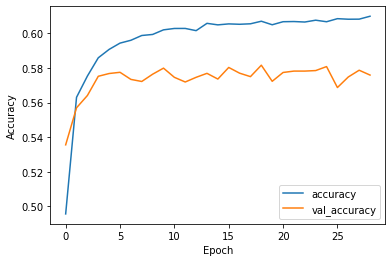

In [8]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

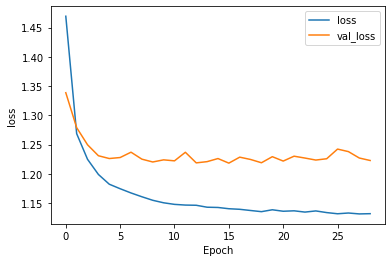

In [9]:
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0, 1])
plt.legend(loc='upper right')

In [10]:
score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 6s 18ms/step - loss: 1.2229 - accuracy: 0.5759
Train Accuracy: 61.625999212265015
Test Accuracy: 57.590001821517944
